In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('height-weight.csv')

In [6]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height (cm)')

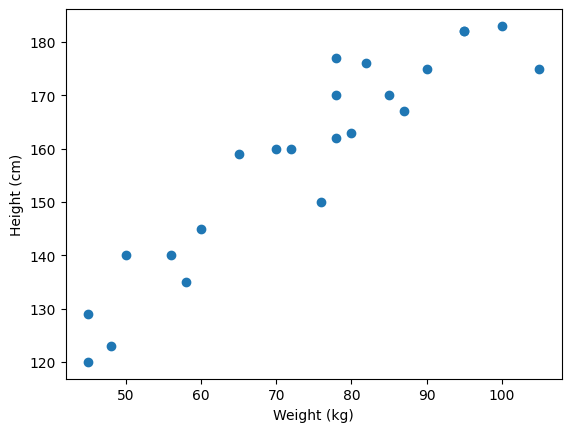

In [7]:
##Scatter Plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')



In [8]:
## correlationcorrelation = df['Weight'].corr(df['Height'])
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


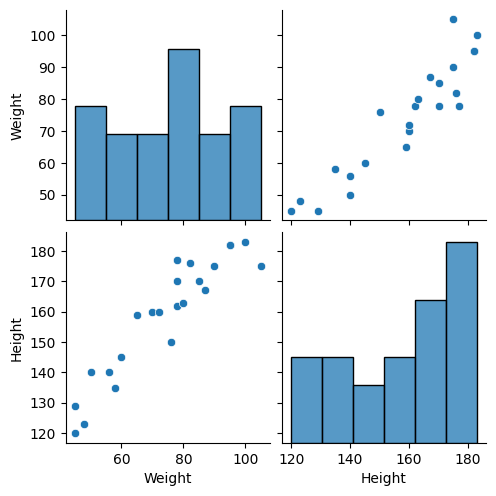

In [9]:
import seaborn as sns
sns.pairplot(df)

In [10]:
## Independent and dependent features
X = df[['Weight']] # Independent features should be 2D
y = df['Height'] # Dependent feature should be 1D

In [11]:
x_series = df['Weight'] # Independent features can be 1D
np.array(x_series).shape

(23,)

In [12]:
## train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [14]:
##Standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled, X_test_scaled

(array([[-0.87662801],
        [ 1.66773133],
        [ 0.33497168],
        [-1.48242785],
        [ 1.36483141],
        [-1.6641678 ],
        [-0.75546804],
        [-0.1496682 ],
        [ 0.21381171],
        [-1.36126788],
        [-0.99778797],
        [-0.02850823],
        [ 1.06193149],
        [ 0.57729161],
        [ 0.75903157],
        [ 0.88019153],
        [ 0.45613165]]),
 array([[ 0.33497168],
        [ 0.33497168],
        [-1.6641678 ],
        [ 1.36483141],
        [-0.45256812],
        [ 1.97063125]]))

In [16]:
##Applying machine learning algorithms of linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)

In [17]:
model.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=-1)

In [18]:
print('Coefficints or slope:', model.coef_)
print('Intercept:', model.intercept_)

Coefficints or slope: [17.2982057]
Intercept: 156.47058823529412


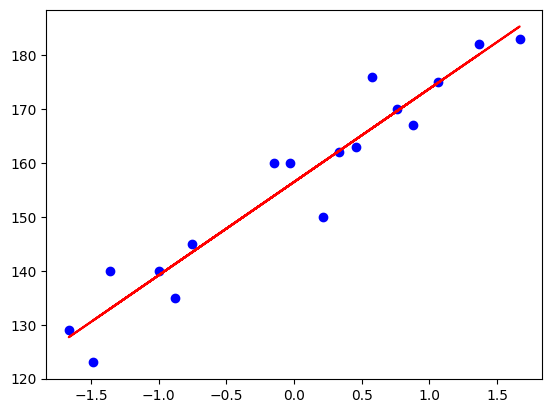

In [19]:
##plot taining data plot best fit line
plt.scatter(X_train_scaled, y_train, color='blue', label='Training Data')
plt.plot(X_train_scaled, model.predict(X_train_scaled), color='red', label='Best Fit Line')

In [20]:
### prediction markdown test data
#1.predicted height output=intercept+coef_(weight)
#y_pred_test=156.470+1.26(X_test_scaled)

In [21]:
##prediction for test data
y_pred = model.predict(X_test_scaled)
y_pred


array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [22]:
##Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)

Mean Absolute Error: 9.66512588679501
Mean Squared Error: 114.84069295228699


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

R^2 Score: 0.7360826717981276


In [24]:
## display adjusted r2 score
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print('Adjusted R^2 Score:', adjusted_r2)

Adjusted R^2 Score: 0.6701033397476595


In [25]:
## prediction for a new data point
model.predict(scaler.transform([[72]]))  # Example weight in kg

d:\Projects\Python\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

In [26]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [28]:
## ols linear regression
import statsmodels.api as sm
ols_model=sm.OLS(y_train, X_train_scaled).fit()
predictions = ols_model.predict(X_test_scaled)
print(predictions)
print(ols_model.summary())

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]
                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 08 Jun 2025   Prob (F-statistic):                       0.664
Time:                        20:58:53   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err       

d:\Projects\Python\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)
